# Project : Book's average rating prediction

Realised by :    
    
  Amanda Nicole ENGOLE

  Freedel ZINSOU-PLY

  Ngutor Emmanuel CHAGBE

  Yann M'POUE

The Goal and main objective of this project is to predict the average ratings given to any book using the Dataset at our disposal, getting rid of uneccessary or irrelevant variables and keeping the variables having the most impact on the ratings. Many steps were followed for the realization of the targeted task.

### Exploratory Data Analysis and Data cleaning  
In this first step we went through the Data for exploration and cleaning:

  -Exploring the Data (checking for null values, duplicates etc...)

  -Cleaning the Data for usage by removing uneccessary elements

### Feature selection :                                                                                                              
Once our database is clean we proceed to the selection of our variables.                                                          
We then created other variables from existing variables, while justifying and conducting a logical reasoning

#### Importing the required libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from math import sqrt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

#### Importing the Data

In [191]:
data = pd.read_csv('C:/Users/mpoue/OneDrive - Data ScienceTech Institute/DSTI Master studies/Python and machine learning/Project-20221122/Project 1/dataset/books.csv', on_bad_lines='skip')

### EDA and Data Cleaning 

In [192]:
# type checks for variables 
print(data.dtypes)
print(f"\n The data has {data.shape[0]} rows and {data.shape[1]} columns")

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

 The data has 11123 rows and 12 columns


In [193]:
# check null_values()
data.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

Fortunately enough, there are no null values in our Data

In [194]:
# checking for duplicates in the data 
data[data.duplicated()].count()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

No duplicate signaled in the Data at hands, very good

In [195]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [196]:
data.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [197]:
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [198]:
# observing columns and their names
print("The columns of our data are: ")
for c in data.columns:
    print(f"\t Column N° {list(data.columns).index(c) + 1} : {c}")

The columns of our data are: 
	 Column N° 1 : bookID
	 Column N° 2 : title
	 Column N° 3 : authors
	 Column N° 4 : average_rating
	 Column N° 5 : isbn
	 Column N° 6 : isbn13
	 Column N° 7 : language_code
	 Column N° 8 :   num_pages
	 Column N° 9 : ratings_count
	 Column N° 10 : text_reviews_count
	 Column N° 11 : publication_date
	 Column N° 12 : publisher


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


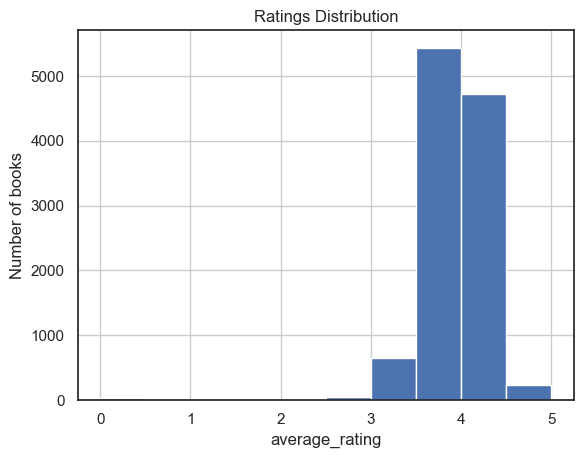

In [200]:
data.average_rating.hist()
plt.title("Ratings Distribution")
plt.xlabel("average_rating")
plt.ylabel("Number of books")
plt.show()

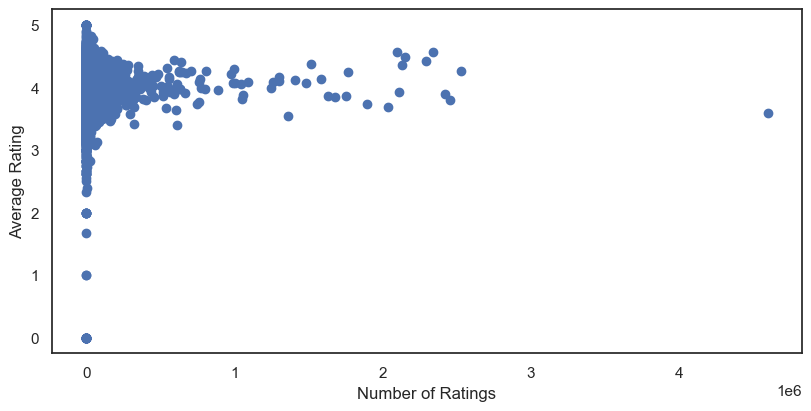

In [201]:
fig = plt.figure(constrained_layout=True, figsize= (8,4)) #Relationship between Ratings count and average rating
plt.scatter(data['ratings_count'],data['average_rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

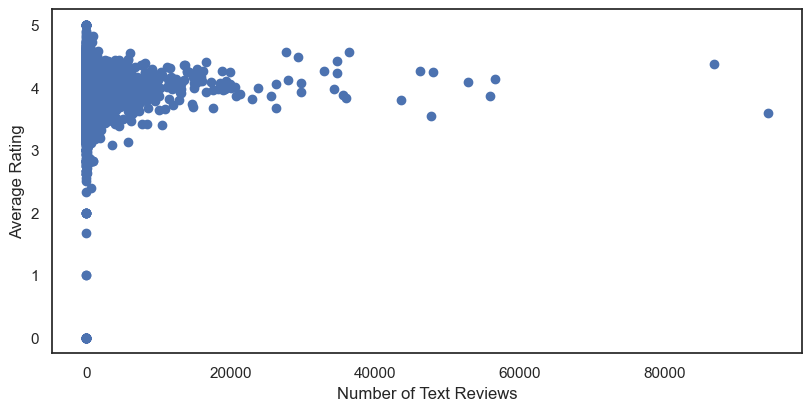

In [202]:
fig = plt.figure(constrained_layout=True, figsize = (8,4)) #Relationship between text reviews count and average rating
plt.scatter(data['text_reviews_count'],data['average_rating'])
plt.xlabel('Number of Text Reviews')
plt.ylabel('Average Rating')
plt.show()

We noticed a similarity in relationship between Text reviews and Ratings count to Average ratings.Both variables present skewdness to the left with some values falling far beyond the cluster concentration.

The following code is for the sake of identifying books that do not have proper author names. "NOT A BOOK" is the name given in the "authors" column. After identifying them, we will simply remove them as they will play no part neither in the Analysis or the prediction which is our global goal.

In [204]:
print(f"N° of Books having no author name : {len(data[data['authors'] == 'NOT A BOOK'])}")

N° of Books having no author name : 5


In [205]:
data = data.drop(data.index[data['authors'] == 'NOT A BOOK'])

Let's now identify the most inspired Author, having written the highest number of books

C:\Users\mpoue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


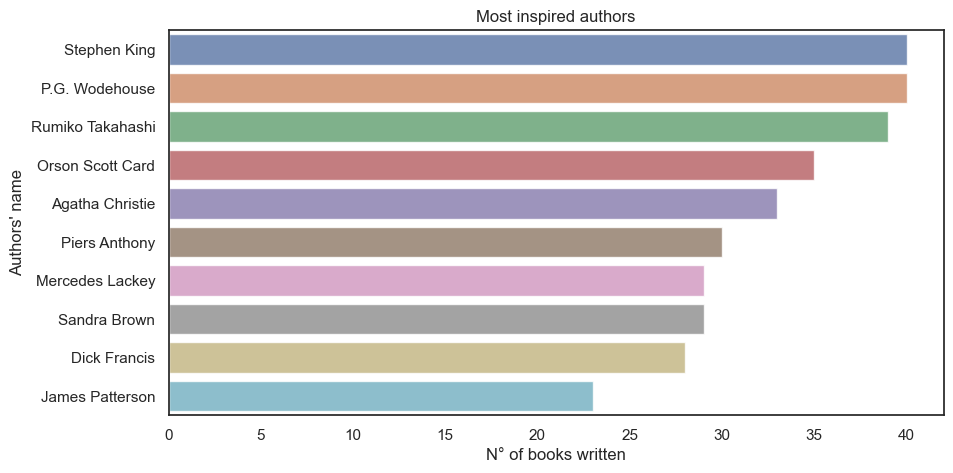

In [206]:
authors_count  = data['authors'].value_counts()
author_count = authors_count[:10,]
plt.figure(figsize = (10,5))
sns.barplot(author_count.values, author_count.index, alpha = 0.8)
plt.title('Most inspired authors')
plt.ylabel("Authors' name", fontsize = 12)
plt.xlabel('N° of books written', fontsize = 12)
plt.show()

Stephen King appears to be the winner

Now, we want to identify the most prolific Author, having written the most rated books (i.e.) books with the highest ratings. As markers, we will use the ratings 4.5 to 5 (being the maximum rating a book can obtain).

C:\Users\mpoue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mpoue\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mpoue\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mpoue\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mpoue\anaconda3\lib\site-packages\IPython\core\pylabtools.p

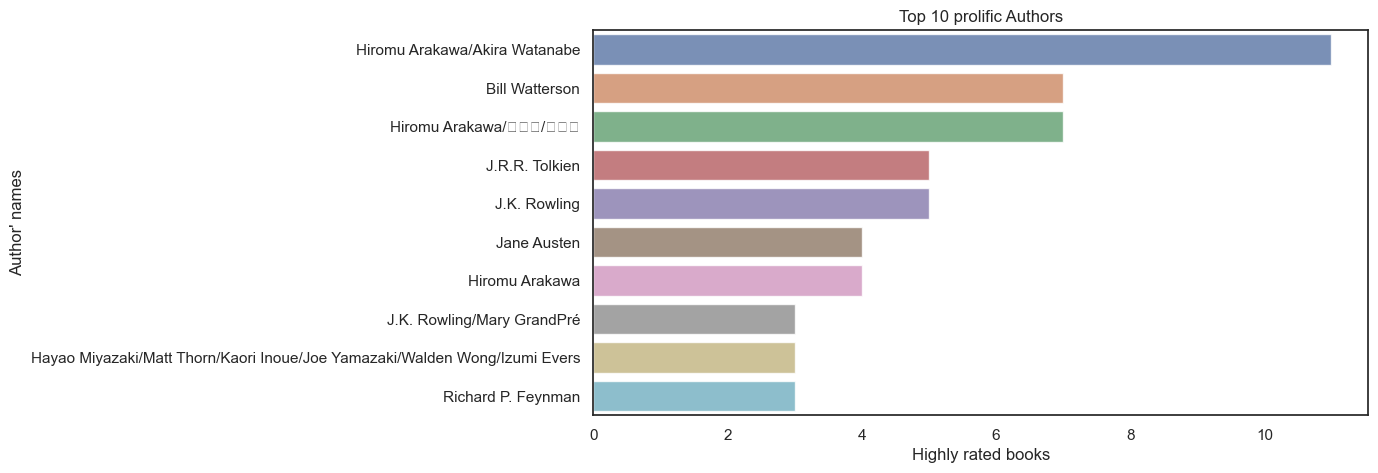

In [207]:
targets = data[(data["average_rating"] > 4.5) & (data["average_rating"] < 5)]
highly_rated = targets['authors'].value_counts()
highly_rated = highly_rated[:10,]
plt.figure(figsize = (10,5))
sns.barplot(highly_rated.values, highly_rated.index, alpha = 0.8)
plt.title('Top 10 prolific Authors')
plt.ylabel("Author' names", fontsize = 12)
plt.xlabel('Highly rated books', fontsize = 12)
plt.show()

Let's calculate the bestseller rate. The bestseller rate is the number of bestsellers written/number of books written. This metric will help us identify the Best author among them all; having the most rated books compared to his/her number of books written.

In [208]:
authors=pd.unique(data['authors'])
nb_books = []
nb_best_books = []
perc_best_book = []
for i in authors :
    b = data[data["authors"] == i] 
    b1 = len(b[(b['average_rating'] >= 4.5) & (b['average_rating'] <= 5)])
    b2 = len(b)
    b3 = (b1/b2)*100
    nb_books.append(b2)
    nb_best_books.append(b1)
    perc_best_book.append(b3)

In [209]:
#Once the data is put into lists, a dataframe is built to allow all the information to be put together
BS = pd.DataFrame(np.column_stack([authors, nb_books, nb_best_books, perc_best_book]), columns=["authors", "nb_books", "nb_best_books", "perc_best_book"])
BS.head()

,authors,nb_books,nb_best_books,perc_best_book
0,J.K. Rowling/Mary GrandPré,6,3,50.0
1,J.K. Rowling,11,5,45.454545
2,W. Frederick Zimmerman,1,0,0.0
3,Douglas Adams,14,1,7.142857
4,Douglas Adams/Stephen Fry,1,0,0.0


In [210]:
BS = BS.sort_values(by = ["perc_best_book"], ascending=False) # we are sorting using the column picturing the metric used
BS

,authors,nb_books,nb_best_books,perc_best_book
6167,John Kenneth Galbraith/James Ronald Stanfield/...,1,1,100.0
3993,Bill Watterson,7,7,100.0
222,Robert A. Caro,1,1,100.0
5045,James H. Billington,1,1,100.0
728,Fulton J. Sheen,1,1,100.0
...,...,...,...,...
2242,Nella Larsen/Carla Kaplan,1,0,0.0
2241,Paul Robert Magocsi,1,0,0.0
2240,William T. Vollmann,5,0,0.0
2239,Louis-Ferdinand Céline/Ralph Manheim/William T...,1,0,0.0


Looking at the displayed result, we observe some discipencies with the authors having written only one books, which in reality is not very appropriate for our analysis. We shall therefore proceed by removing these columns and then keping only authors having a minimum of 10 books.

In [211]:
BS.drop(BS[BS.nb_books < 10].index, inplace = True)
BS

,authors,nb_books,nb_best_books,perc_best_book
190,Hiromu Arakawa/Akira Watanabe,12,12,100.0
6,J.R.R. Tolkien,17,9,52.941176
1,J.K. Rowling,11,5,45.454545
414,Jane Austen,12,4,33.333333
2022,C.S. Lewis,10,1,10.0
...,...,...,...,...
2149,Iain M. Banks,10,0,0.0
2135,Anne Rice,17,0,0.0
2285,James A. Michener,11,0,0.0
2264,P.G. Wodehouse,40,0,0.0


In [212]:
BS = BS.sort_values(by = ["perc_best_book"], ascending=False)
# Let's us sort and abserve the top five of most excellent authors
BS.head()

,authors,nb_books,nb_best_books,perc_best_book
190,Hiromu Arakawa/Akira Watanabe,12,12,100.0
6,J.R.R. Tolkien,17,9,52.941176
1,J.K. Rowling,11,5,45.454545
414,Jane Austen,12,4,33.333333
2022,C.S. Lewis,10,1,10.0


We are now left with a total of 106 authors having at least 10 books. And as a result of that, the tandem Hiromu and Akira watanabe apppear to be the best authors with the most appreciated books (most rated) having a rate of 100%. They are followed by JRR Tolkien, JK rowling, Jane Austen and C.S Lewis.  

Having looked at the authors, let's now dive and look at the books and their characteristics; among which the most important are the title, the authors that we already looked at, the age (related to the publication date), the language and the rating.

#### Let's see the average age of publication of the books

In [213]:
data['publication_year'] = data.apply(lambda x: x['publication_date'][-4:], axis=1) #First , we will create a columns publication_year
data['publication_year'] = pd.to_numeric(data['publication_year'])
data['book_age'] = data.publication_year.apply(lambda x: x if x < 1 else 2023-x) # Then we Create Book age column using published year

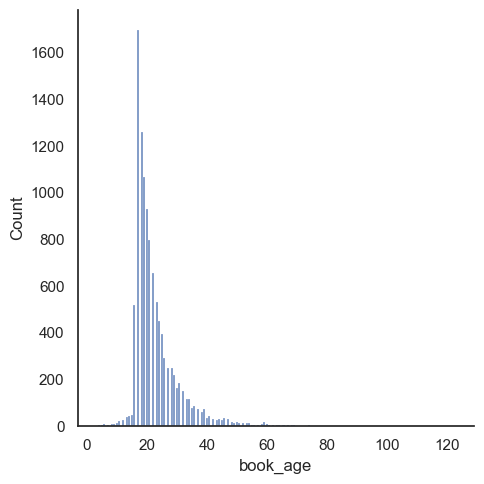

In [214]:
sns.displot(data.book_age) 

In [215]:
print(f" The average book age in the data is: {round(data['book_age'].mean(), 3)}")

 The average book age in the data is: 22.831


Approximatively, the average book age is 23 yrs old.

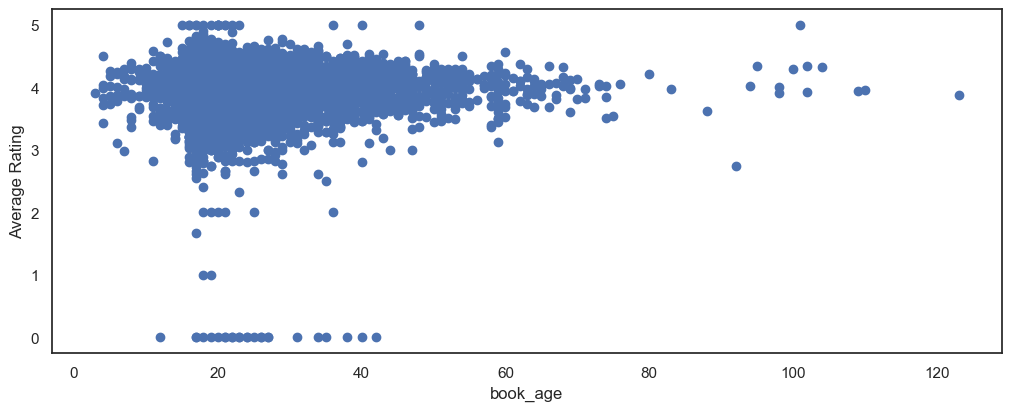

In [216]:
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(data['book_age'],data['average_rating'],)
plt.xlabel('book_age')
plt.ylabel('Average Rating')
plt.show()

From the above plot, we can read that books aging from approximatively 20 to just below 30 yrs old tend to be the most rated books. Furthermore, we see that majority of books rated are <60 years old. In addition,the majority among these received an average rating above 2.5. The lowest rated books also fall within this age bracket. But recall that the model is meant to predict a book rating whether high or low. Based on the assumption that a book may be rated by age/rarity.. we decided to keep all books old and new.

We then decided to examine the langauge column to see the distribution of langauges as well as relationship with ratings

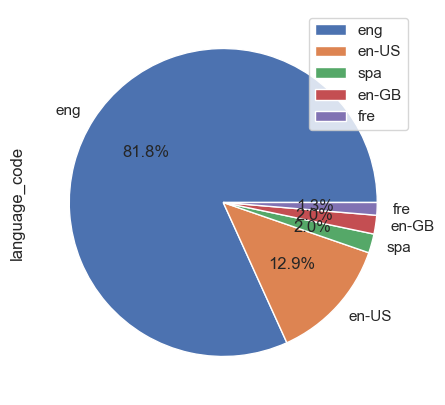

In [217]:
# Looking at the language occurrences
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct ='%1.1f%%', figsize =(8, 5)).legend()

English in all of its forms appears to be the most used language among the books of the data at hands.

Let's now combine every form of english into only one language code (i.e.) "en", for a better viewing of the english language.

### Feature Engineering and selection

In [218]:
def language(lang):
    if lang == 'eng' or lang =='en-US' or lang =='en-GB' or lang =="en-CA":
        return 'en'
    else:
        return lang

data['language_code'] = data['language_code'].apply(language)

In [219]:
data['language_code'].value_counts()

en     10532
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
nl         1
ara        1
srp        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: language_code, dtype: int64

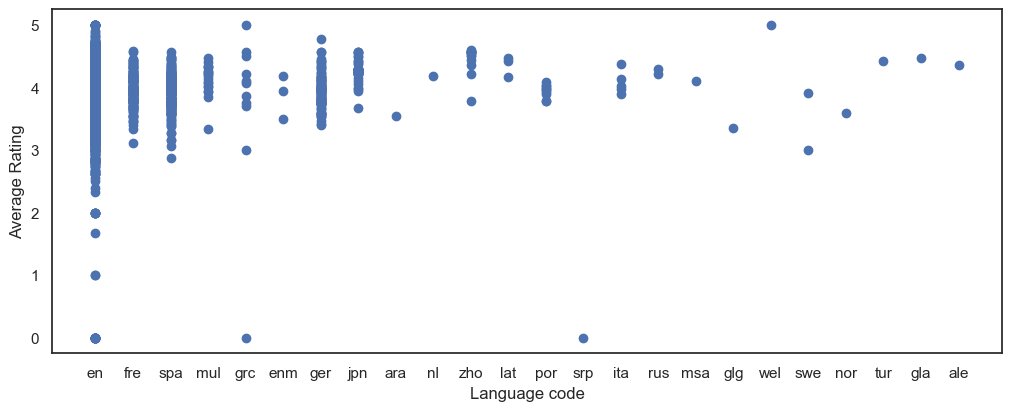

In [220]:
#Relationship between langauage code and Average ratings.
fig = plt.figure(constrained_layout=True, figsize = (10,4))
plt.scatter(data['language_code'],data['average_rating'],)
plt.xlabel('Language code')
plt.ylabel('Average Rating')
plt.show() 

As the task here is prediction of a certain variable using other variables, it is important  to look at the different correlation of these variables together and with the targeted variable to be predicted (i.e.) the book rating. We will therefore build a heat map for that purpose.

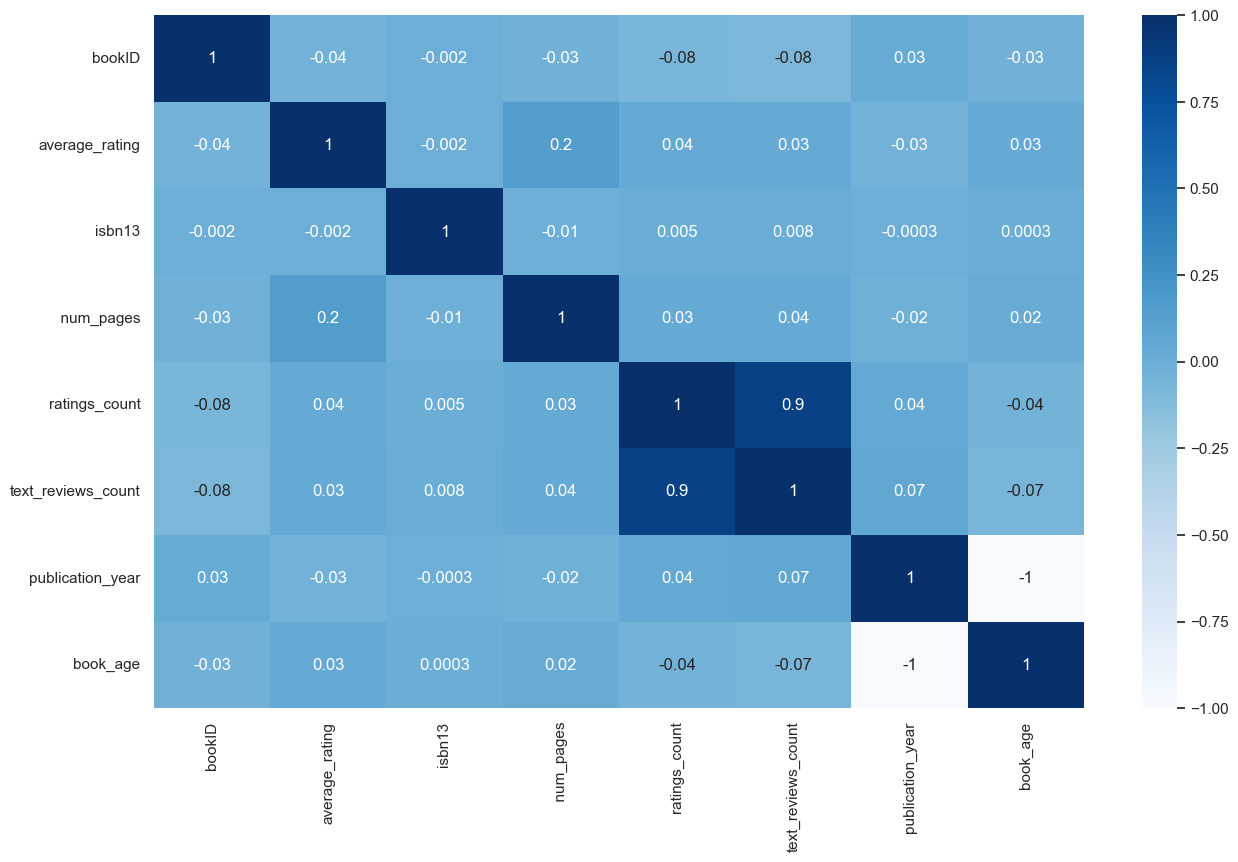

In [221]:
plt.figure(figsize = (15,9))
sns.set_theme(style = "white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot = True, cmap = "Blues", fmt ='.1g')

In [222]:
# Dropping uneccessary columns
data = data.drop(["bookID"], axis = 1)
data = data.drop(["isbn"], axis = 1)
data = data.drop(["isbn13"], axis = 1)
data = data.drop(data.index[data["  num_pages"]>1000])
data = data.drop(data.index[data["text_reviews_count"]>10000])
data = data.drop(data.index[data["book_age"]>40])

In [223]:
#encoding author columns, title columns, publisher columns
le = preprocessing.LabelEncoder()
data["authors"] = le.fit_transform(data["authors"])
data["title"] = le.fit_transform(data["title"])
data["publisher"] = le.fit_transform(data["publisher"])

### Prediction
The Goal here, is to try different methods for the completing of our task and then select the most precise and effcient of them all. Task : Predicting Book rating.

In [224]:
X = data.drop(["average_rating", "publication_date", "language_code"], axis = 1)

In [225]:
y = data["average_rating"]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [227]:
X_train

,title,authors,num_pages,ratings_count,text_reviews_count,publisher,publication_year,book_age
2449,877,2105,320,60,4,565,2011,12
6827,3120,252,352,52,5,1684,2000,23
5186,7290,3736,619,4345,246,1431,2005,18
410,7901,2308,541,760871,6557,1431,2006,17
9430,3897,162,352,8,0,2096,2001,22
...,...,...,...,...,...,...,...,...
6193,9102,1672,238,38,8,934,2005,18
5634,131,4107,500,220,14,903,2006,17
5841,5104,5445,0,15,1,1562,2007,16
965,6165,1634,186,592,49,125,2005,18


#### Linear regression model

In [228]:
Lregression = LinearRegression()
Lregression.fit(X_train, y_train)
y_pred = Lregression.predict(X_test)

print("The RMSE value of the Linear regression Model is: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print(f"Accuracy score : {Lregression.score(X_train,y_train)}")

The RMSE value of the Linear regression Model is: 0.34467138248704404
Accuracy score : 0.012517662656258866


#### KNN Regression

In [229]:
Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(mean_squared_error(y_test, Knn.predict(X_test))) 
print('The RMSE value of the KNN Model is : {}'.format(error))
print('Accuracy score : {}'.format(Knn.score(X_train,y_train)))

The RMSE value of the KNN Model is : 0.37360266968157885
Accuracy score : 0.25858071353935763


#### Random Forest Regressor 

In [230]:
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
y_pred=RForest.predict(X_test)
error = sqrt(mean_squared_error(y_test, RForest.predict(X_test))) 
print('The RMSE value of the RandomForestModel is : {}'.format(error))
print('Accuracy score : {}'.format(RForest.score(X_train,y_train)))  

The RMSE value of the RandomForestModel is : 0.32688779141917107
Accuracy score : 0.8871416217794794


As we can see The Random forest model appears to obtain the best score among the models used for our task, with the lowest RMSE and the highest accuracy score

In [231]:
data_predict = pd.concat([pd.DataFrame(y_pred.tolist(),columns=["Predict"]), pd.DataFrame(y_test.tolist(),columns=["Real"])],axis=1)
data_predict

,Predict,Real
0,3.8490,3.94
1,3.7661,4.38
2,3.8787,3.89
3,3.9621,4.17
4,4.0209,4.08
...,...,...
3114,3.8854,4.37
3115,3.9386,4.41
3116,3.9513,4.02
3117,3.8562,3.83


#### Conclusion

This work allowed us to better understand the world of data. One of the most interesting parts was the data mining. This part was very important because it allowed us to better understand the data but especially to ask ourselves the question how to build a story with the data at hand, what features to select and how to go on with them in our prediction. Correlation study was key here as we were looking for the most relevant variable compared to the targeted variable( the rating of the books).                                                                                                             
The prediction part was the most determining, it showed us that we have to try several models to find the right one. But it also allowed us to better understand the machine learning algorithms.  After having tested three algorithms, we opted for the most efficient and accurate one appearing to be The Random Forest with the lowest RMSE also.                                                                    
To conclude this work was also an opportunity to work in group, to discuss, to confront our ideas and to set up an organization to reach the desired objectives. A combination of capabilities and knowledge, key to success of a grouped enterprise.